In [70]:
#import libraries
import numpy as np
import pandas as pd
import sklearn

from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import statsmodels.api as sm


In [71]:
#import dataset
data= pd.read_csv(r'C:\Users\Robert\Desktop\mbti_1.csv')

In [72]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [73]:
#Add a column to specify if extroverted.
data['extroverted']= data.type.str[:1]
#df['New_Sample'] = df.Sample.str[:1]

data.head()

,type,posts,extroverted
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I
1,ENTP,'I'm finding the lack of me in these posts ver...,E
2,INTP,'Good one _____ https://www.youtube.com/wat...,I
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I
4,ENTJ,'You're fired.|||That's another silly misconce...,E


In [74]:
#how many is I vs. E in dataset?
data.describe()

,type,posts,extroverted
count,8675,8675,8675
unique,16,8675,2
top,INFP,'Afterburner your reasoning is EPIC!|||Patriot...,I
freq,1832,1,6676


In [75]:
#breakdown of types in survery
type_data = data.groupby('type')
type_data.describe()

extroverted                  posts         \
           count unique top  freq count unique   
type                                             
ENFJ         190      1   E   190   190    190   
ENFP         675      1   E   675   675    675   
ENTJ         231      1   E   231   231    231   
ENTP         685      1   E   685   685    685   
ESFJ          42      1   E    42    42     42   
ESFP          48      1   E    48    48     48   
ESTJ          39      1   E    39    39     39   
ESTP          89      1   E    89    89     89   
INFJ        1470      1   I  1470  1470   1470   
INFP        1832      1   I  1832  1832   1832   
INTJ        1091      1   I  1091  1091   1091   
INTP        1304      1   I  1304  1304   1304   
ISFJ         166      1   I   166   166    166   
ISFP         271      1   I   271   271    271   
ISTJ         205      1   I   205   205    205   
ISTP         337      1   I   337   337    337   

                                                              
                                                    top freq  
type                                                          
ENFJ  'There are some really awesome ENFJ facebook g...    1  
ENFP  'What do you mean?  What's changed?  I feel a ...    1  
ENTJ  'Usually when I am in a group consisting large...    1  
ENTP  Haven't had time to think.|||Oh, christ. Now I...    1  
ESFJ  Entj|||Esfp|||Entp|||Esfj|||Estp|||Infp|||Intj...    1  
ESFP  'Good job! William I am!!!|||Yes to both.  Sel...    1  
ESTJ  hitler was what he was,and i am estj or esfj. ...    1  
ESTP  'Class clown. I made a joke out of everything|...    1  
INFJ  'desperately wish there was a moment every day...    1  
INFP  'I can say if I was winked at I would be throw...    1  
INTJ  'Afterburner your reasoning is EPIC!|||Patriot...    1  
INTP  'I totally analyzed you a figured out who you ...    1  
ISFJ  I would say Gayle is an INFP 4w5 so/sx, a very...    1  
ISFP  'I was with an ENFJ, and this is extremely acc...    1  
ISTJ  'http://www.youtube.com/watch?v=EOgfZHxTgts|||...    1  
ISTP  'Lol. But hey, men can be gorgeous too.|||Nope...    1

In [76]:
data['extroverted'].replace(['I','E'],['0','1'],inplace=True)

data.head()

,type,posts,extroverted
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,0
1,ENTP,'I'm finding the lack of me in these posts ver...,1
2,INTP,'Good one _____ https://www.youtube.com/wat...,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",0
4,ENTJ,'You're fired.|||That's another silly misconce...,1


In [77]:
data.dtypes

type           object
posts          object
extroverted    object
dtype: object

In [78]:
data['extroverted'] = data['extroverted'].astype('int')

In [79]:
data.dtypes

type           object
posts          object
extroverted     int32
dtype: object

In [80]:
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union(['http', 'isfj', 'infp', 'intj', 'https', 'com', 'youtube', 'enfp', 'entp',
                                            'infj', 'infp', 'intj','intp',
 'intp','istj', 'istp', '00', 'enfps', 'entps', 'infjs', 'enfjs', 'estps',
                                            'entj', 'esfjs', 'existence', 'infps', 'enfj', 'entjs', 'intps',
 '000',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '1000',
 '101',
 '10th',
 '11',
 '110',
 '11th',
 '12',
 '120',
 '13',
 '130',
 '14',
 '140',
 '15',
 '150',
 '16',
 '16personalities',
 '17',
 '18',
 '180',
 '19',
 '1984',
 '1995',
 '1s',
 '1st',
 '1w2',
 '1w9',
 '20',
 '200',
 '2000',
 '2001',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '20s',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '2nd',
 '2w1',
 '2w3',
 '30',
 '300',
 '30s',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '3D',
 '3rd',
 '3s',
 '3w2',
 '3w4',
 '40',
 '400',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '4s',
 '4th',
 '4w3',
 '4w5',
 '50',
 '500',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '564x',
 '57',
 '58',
 '59',
 '5s',
 '5th',
 '5w4',
 '5w6',
 '60',
 '600',
 '60s',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '6s',
 '6th',
 '6w5',
 '6w7',
 '70',
 '70s',
 '71',
 '72',
 '73',
 '736x',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '7s',
 '7th',
 '7w6',
 '7w8',
 '80',
 '80s',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '8s',
 '8th',
 '8w7',
 '8w9',
 '90',
 '90s',
 '91',
 '92',
 '94',
 '95',
 '98',
 '99',
 '9s',
 '9th',
 '9w1',
 '9w8', '125',
 '160',
 '2003',
 '2004',])

In [93]:
#create our count vectorizer
count_vectorizer = CountVectorizer(analyzer='word', min_df=1, stop_words = stop_words, lowercase=True,max_features=1000)

#Transform the list of strings
transform = count_vectorizer.fit_transform(data.posts).toarray()

In [94]:
#shows list of stopwords
#count_vectorizer.get_stop_words()

frozenset({'00',
           '000',
           '01',
           '02',
           '03',
           '04',
           '05',
           '06',
           '07',
           '08',
           '09',
           '10',
           '100',
           '1000',
           '101',
           '10th',
           '11',
           '110',
           '11th',
           '12',
           '120',
           '125',
           '13',
           '130',
           '14',
           '140',
           '15',
           '150',
           '16',
           '160',
           '16personalities',
           '17',
           '18',
           '180',
           '19',
           '1984',
           '1995',
           '1s',
           '1st',
           '1w2',
           '1w9',
           '20',
           '200',
           '2000',
           '2001',
           '2003',
           '2004',
           '2005',
           '2006',
           '2007',
           '2008',
           '2009',
           '2010',
           '2011',
           '2012',
   

In [95]:
transform

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [2, 1, 2, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 1],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0]], dtype=int64)

In [96]:
transform.shape

(8675, 1000)

In [97]:
count_vectorizer.get_feature_names()

['ability',
 'able',
 'absolutely',
 'accept',
 'according',
 'accurate',
 'act',
 'action',
 'actions',
 'actual',
 'actually',
 'add',
 'admit',
 'advice',
 'afraid',
 'age',
 'ago',
 'agree',
 'ah',
 'albums',
 'alot',
 'alright',
 'amazing',
 'anger',
 'angry',
 'animals',
 'anime',
 'annoying',
 'answer',
 'answers',
 'anxiety',
 'anymore',
 'anyways',
 'apparently',
 'appreciate',
 'approach',
 'area',
 'aren',
 'argument',
 'art',
 'article',
 'ask',
 'asked',
 'asking',
 'ass',
 'assume',
 'attention',
 'attracted',
 'attractive',
 'avatar',
 'average',
 'avoid',
 'aware',
 'away',
 'awesome',
 'awkward',
 'baby',
 'bad',
 'based',
 'basically',
 'beautiful',
 'bed',
 'beginning',
 'behavior',
 'believe',
 'best',
 'better',
 'big',
 'biggest',
 'bit',
 'black',
 'blue',
 'blushed',
 'body',
 'book',
 'books',
 'bored',
 'boring',
 'born',
 'bother',
 'boy',
 'boyfriend',
 'brain',
 'break',
 'bring',
 'brother',
 'btw',
 'bunch',
 'business',
 'busy',
 'buy',
 'called',
 'calm

In [98]:
#deploy and evaluate model
X=transform
y= data.extroverted
LogReg = LogisticRegression()
log_model = LogReg.fit(X, y)
print(LogReg.score(X, y))

0.831469740634


In [99]:
y_pred = LogReg.predict(X)
from sklearn.metrics import classification_report
#print(classification_report(y, y_pred))
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [100]:
#predict probability
LogReg.predict_proba(X)

array([[ 0.98611172,  0.01388828],
       [ 0.24652963,  0.75347037],
       [ 0.9876008 ,  0.0123992 ],
       ..., 
       [ 0.79772296,  0.20227704],
       [ 0.58838976,  0.41161024],
       [ 0.91377169,  0.08622831]])

In [101]:
# Check trained model intercept
print("Intercept is ",  log_model.intercept_)

# Check trained model coefficients
print("Coefficients are",  log_model.coef_)

Intercept is  [-0.87775154]
Coefficients are [[ -5.28997687e-02   2.86176034e-02   3.36041054e-02  -2.36611411e-02
    1.00055925e-02  -1.36921426e-01   2.17613577e-02  -1.52126704e-02
    2.30634796e-01   4.47117324e-02  -4.68193753e-05  -2.16254118e-03
    5.37954702e-02   1.87829004e-02  -2.01270984e-01  -8.77103720e-03
    1.06312899e-01  -1.03347004e-02  -4.69906221e-02   3.34363028e-02
    9.54529808e-02  -6.75883567e-02   8.91682435e-02  -4.90272948e-02
    3.02870909e-02  -1.30802291e-01  -3.02986439e-01   1.20644477e-01
    2.56006265e-02  -1.95581450e-01  -5.05059479e-02   1.87568946e-02
   -5.99876815e-02  -4.05848147e-02   1.25755964e-02   7.65851671e-02
    1.07088056e-01  -2.27790255e-02   9.31370152e-02  -3.21706362e-02
   -4.04155789e-02   1.43227058e-02  -1.61132109e-03  -1.54815822e-01
    6.71914048e-02   9.74678338e-03   1.57335691e-01  -4.94103679e-02
   -9.27600191e-02  -1.46619570e-02  -2.19002404e-01   4.54936003e-02
    7.77545383e-02  -4.77031209e-02   1.19555

In [102]:
#http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=LogReg, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)



Optimal number of features : 64


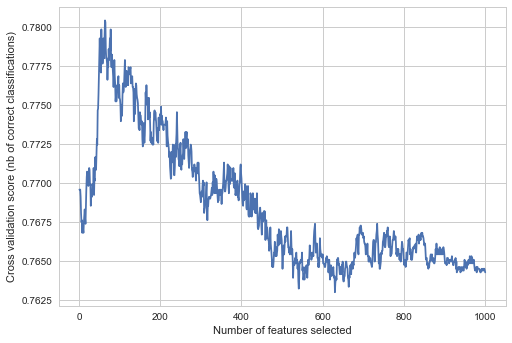

In [103]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [104]:
logit_model=sm.Logit(y,rfecv.transform(X))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.488907
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            extroverted   No. Observations:                 8675
Model:                          Logit   Df Residuals:                     8611
Method:                           MLE   Df Model:                           63
Date:                Mon, 30 Apr 2018   Pseudo R-squ.:                 0.09428
Time:                        01:25:08   Log-Likelihood:                -4241.3
converged:                       True   LL-Null:                       -4682.7
                                        LLR p-value:                6.310e-145
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2796      0.082     -3.409      0.001      -0.440      -0.119
x2            -0.4072      0.

In [106]:
rfecv.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [120]:
support = rfecv.get_support()
#Now support is an array, you can use that to efficiently extract the name of your selected features (columns). Make sure your feature names are in a numpy array, not a python list.

feature_names = np.array(count_vectorizer.get_feature_names()) # transformed list to array

feature_names_support = feature_names[support]

In [108]:
rfecv.score(X, y)

0.7887031700288184

In [146]:
#change max rows to show
pd.options.display.max_rows =100
pd.options.display.max_rows

100

In [148]:
final = pd.DataFrame({'feature name':feature_names_support, 'coefficient': result.params})
#https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
def order(frame,var):
    if type(var) is str:
        var = [var] #let the command take a string or list
    varlist =[w for w in frame.columns if w not in var]
    frame = frame[var+varlist]
    return frame 
final = order(final, ['feature name'])
final = final.sort_values('coefficient', ascending = False)
final

,feature name,coefficient
x43,ne,0.252407
x5,bored,0.216664
x14,debate,0.216558
x7,business,0.210116
x34,hahaha,0.175742
x23,estp,0.170026
x11,dated,0.148015
x25,excited,0.144750
x16,developed,0.140425
x61,wanna,0.140193
